# 2) Read the Titanic dataset and perform the following operations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Karthik/Python AIML Programs/Titanic_Dataset.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.25000,S,Third,man,True,A,Southampton,no,False
1,1,1,female,38.000000,1,0,249.00622,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.92500,S,Third,woman,False,A,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.05000,S,Third,man,True,A,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.00000,S,Second,man,True,A,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45000,S,Third,woman,False,A,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00000,C,First,man,True,C,Cherbourg,yes,True


# a) Identify the outliers using scatter and box plot.

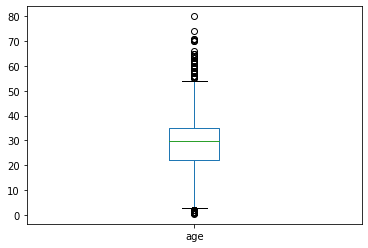

In [3]:
df['age'].plot(kind="box")
plt.show()

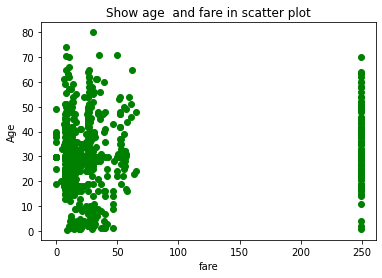

In [4]:
plt.scatter(df['fare'] ,df['age'] ,marker='o' ,c='green')
plt.title("Show age  and fare in scatter plot")
plt.xlabel('fare')
plt.ylabel("Age")
plt.show()

# b) Replace the outliers using mean median values.

In [5]:
# md=np.median(df['fare'])
# print("Median is :",md)

In [6]:
r=np.mean(df['age'])
print("Mean is :",r)


Mean is : 29.699117647058763


In [7]:
upper_bound=65
lower_bound=0


In [8]:
for i in df['fare']:
    if i < lower_bound or i> upper_bound:
        df['fare']=df['fare'].replace(i,r)
        
df['fare']        

0       7.250000
1      29.699118
2       7.925000
3      53.100000
4       8.050000
         ...    
886    13.000000
887    30.000000
888    23.450000
889    30.000000
890     7.750000
Name: fare, Length: 891, dtype: float64

# c) Replace the outliers using upper and lower cap

In [9]:
fare_arr=df['fare']
lower_cap=np.percentile(fare_arr,0)
upper_cap=np.percentile(fare_arr,65)


In [10]:
for i in df['fare']:
    if i<lower_bound:
        df['fare']=df['fare'].replace(i,lower_cap)
    elif i<upper_bound:
        df['fare']=df['fare'].replace(i,upper_cap)      

# d) Remove the data objects with outliers.

In [15]:
upper_index=df[df['fare']>upper_bound].index
df.drop(upper_index,inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,26.0,S,Third,man,True,A,Southampton,no,False
1,1,1,female,38.000000,1,0,26.0,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,26.0,S,Third,woman,False,A,Southampton,yes,True
3,1,1,female,35.000000,1,0,26.0,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,26.0,S,Third,man,True,A,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,26.0,S,Second,man,True,A,Southampton,no,True
887,1,1,female,19.000000,0,0,26.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,26.0,S,Third,woman,False,A,Southampton,no,False
889,1,1,male,26.000000,0,0,26.0,C,First,man,True,C,Cherbourg,yes,True


In [17]:
df.describe().sum()

survived     893.870431
pclass       906.144713
age         1100.820251
sibsp        901.625751
parch        898.187651
fare        1087.934243
dtype: float64

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,26.0,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,26.0,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,26.0,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,26.0,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,26.0,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df[['age','fare']].describe()

,age,fare
count,891.000000,891.000000
mean,29.699118,26.087542
std,13.002015,1.846701
min,0.420000,26.000000
25%,22.000000,26.000000
50%,29.699118,26.000000
75%,35.000000,26.000000
max,80.000000,65.000000
